Namespace(dataset='citeseer', dropout=0.5, fff='/root/.local/share/jupyter/runtime/kernel-32435552-1260-4695-86c9-24ef7079e1c2.json', gpu=-1, lr=0.01, n_epochs=500, n_hidden=16, n_layers=1, self_loop=False, weight_decay=0.0005)
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
----Data statistics------'
      #Edges 9228
      #Classes 6
      #Train samples 120
      #Val samples 500
      #Test samples 1000


/usr/local/lib/python3.7/dist-packages/dgl/data/utils.py:285: UserWarning: Property dataset.num_labels will be deprecated, please use dataset.num_classes instead.
  warnings.warn('Property {} will be deprecated, please use {} instead.'.format(old, new))
/usr/local/lib/python3.7/dist-packages/dgl/data/utils.py:285: UserWarning: Property dataset.graph will be deprecated, please use dataset[0] instead.
  warnings.warn('Property {} will be deprecated, please use {} instead.'.format(old, new))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 00000 | Time(s) nan | Loss 1.7916 | Accuracy 0.2420 | ETputs(KTEPS) nan
Epoch 00001 | Time(s) nan | Loss 1.7840 | Accuracy 0.1920 | ETputs(KTEPS) nan
Epoch 00002 | Time(s) nan | Loss 1.7777 | Accuracy 0.2900 | ETputs(KTEPS) nan
Epoch 00003 | Time(s) 0.0486 | Loss 1.7648 | Accuracy 0.3040 | ETputs(KTEPS) 189.83
Epoch 00004 | Time(s) 0.0480 | Loss 1.7578 | Accuracy 0.3200 | ETputs(KTEPS) 192.33
Epoch 00005 | Time(s) 0.0478 | Loss 1.7461 | Accuracy 0.3540 | ETputs(KTEPS) 193.24
Epoch 00006 | Time(s) 0.0477 | Loss 1.7314 | Accuracy 0.3440 | ETputs(KTEPS) 193.48
Epoch 00007 | Time(s) 0.0481 | Loss 1.7272 | Accuracy 0.3700 | ETputs(KTEPS) 191.72
Epoch 00008 | Time(s) 0.0480 | Loss 1.7094 | Accuracy 0.3820 | ETputs(KTEPS) 192.39
Epoch 00009 | Time(s) 0.0480 | Loss 1.7034 | Accuracy 0.4060 | ETputs(KTEPS) 192.16
Epoch 00010 | Time(s) 0.0480 | Loss 1.6843 | Accuracy 0.4100 | ETputs(KTEPS) 192.23
Epoch 00011 | Time(s) 0.0484 | Loss 1.6791 | Accuracy 0.4240 | ETputs(KTEPS) 190.51
Epoch 0001

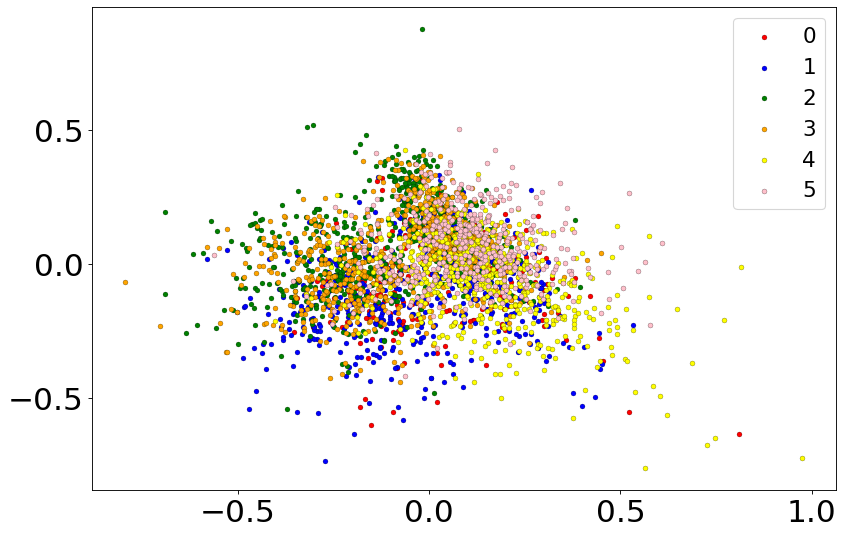

running tsne
tsne time 25.52278447151184
silhouette average -0.08803175 std 0.1592448
davies bouldin score 20.983667345236565
calinski harabasz score 13.932882699122182


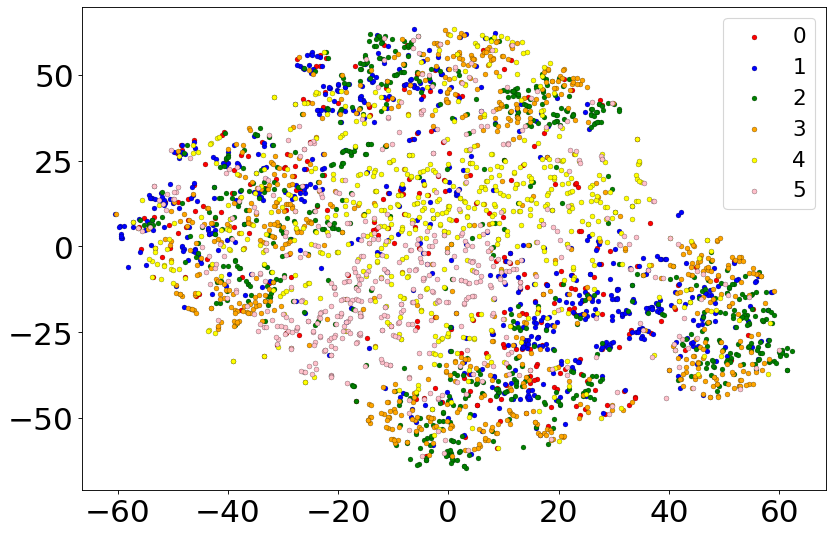

running umap
umap time 19.993971347808838
silhouette average -0.09787856 std 0.2177435
davies bouldin score 22.666160877933876
calinski harabasz score 38.820322938265825


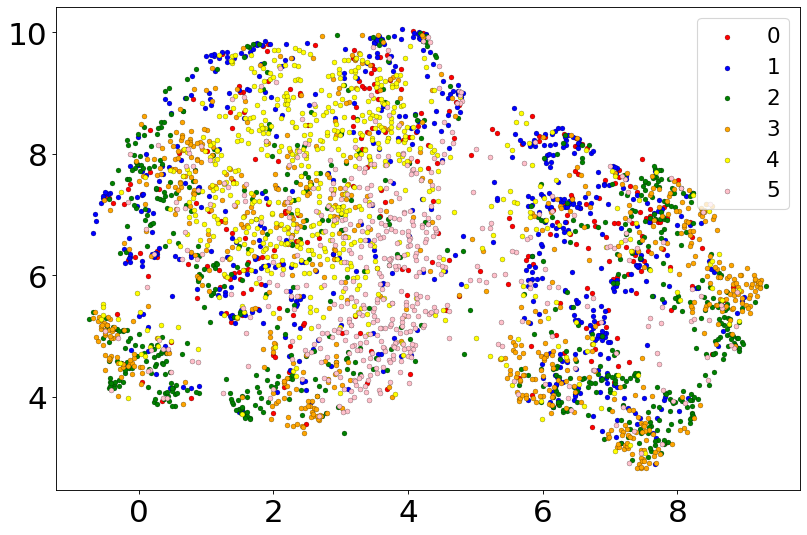

100%|██████████| 3327/3327 [00:00<00:00, 140559.33it/s]

running ivis
Building KNN index



 15%|█▍        | 498/3327 [00:00<00:00, 4972.16it/s]

Extracting KNN neighbours


100%|██████████| 3327/3327 [00:00<00:00, 3498.47it/s]


Training neural network
Epoch 1/1000
26/26 [==============================] - 1s 11ms/step - loss: 1.0810
Epoch 2/1000
26/26 [==============================] - 0s 12ms/step - loss: 1.0016
Epoch 3/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.9281
Epoch 4/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.8510
Epoch 5/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.8065
Epoch 6/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.7437
Epoch 7/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.7202
Epoch 8/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.6721
Epoch 9/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.6734
Epoch 10/1000
26/26 [==============================] - 0s 13ms/step - loss: 0.6235
Epoch 11/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.5986
Epoch 12/1000
26/26 [==============================] - 0s 13ms/step - lo

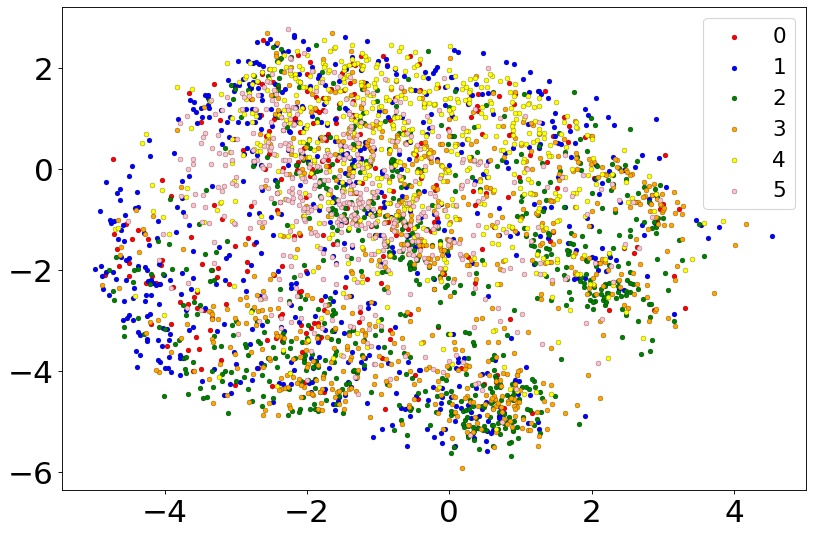

Epoch 00499 | Time(s) 0.2719 | Loss 0.3266 | Accuracy 0.6940 | ETputs(KTEPS) 33.94

Test accuracy 67.90%


In [9]:
!pip install dgl
!pip install umap-learn
!pip install ivis[cpu]
import umap
import argparse
import time
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
from dgl.data import register_data_args
from dgl.data import CoraGraphDataset, CiteseerGraphDataset, PubmedGraphDataset
from sklearn.metrics import silhouette_samples, silhouette_score
import sys
sys.path.append('/content/drive/MyDrive/Thesis')
from visualize_embeddings import *
sys.path.append('/content/drive/MyDrive/Thesis/gcn')
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.io import savemat

from gcn import GCN
from sklearn.decomposition import PCA
from scipy.stats import zscore


def evaluate(model, features, labels, mask):
    model.eval()
    with torch.no_grad():
        h, logits = model(features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)


def main(args):
    # load and preprocess dataset
    if args.dataset == 'cora':
        data = CoraGraphDataset()
    elif args.dataset == 'citeseer':
        data = CiteseerGraphDataset()
    elif args.dataset == 'pubmed':
        data = PubmedGraphDataset()
    else:
        raise ValueError('Unknown dataset: {}'.format(args.dataset))

    g = data[0]
    if args.gpu < 0:
        cuda = False
    else:
        cuda = True
        g = g.int().to(args.gpu)

    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    in_feats = features.shape[1]
    n_classes = data.num_labels
    n_edges = data.graph.number_of_edges()
    print("""----Data statistics------'
      #Edges %d
      #Classes %d
      #Train samples %d
      #Val samples %d
      #Test samples %d""" %
          (n_edges, n_classes,
              train_mask.int().sum().item(),
              val_mask.int().sum().item(),
              test_mask.int().sum().item()))

    # add self loop
    if args.self_loop:
        g = dgl.remove_self_loop(g)
        g = dgl.add_self_loop(g)
    n_edges = g.number_of_edges()

    # normalization
    degs = g.in_degrees().float()
    norm = torch.pow(degs, -0.5)
    norm[torch.isinf(norm)] = 0
    if cuda:
        norm = norm.cuda()
    g.ndata['norm'] = norm.unsqueeze(1)

    # create GCN model
    model = GCN(g,
                in_feats,
                args.n_hidden,
                n_classes,
                args.n_layers,
                F.relu,
                args.dropout)

    if cuda:
        model.cuda()
    loss_fcn = torch.nn.CrossEntropyLoss()



    # use optimizer
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=args.lr,
                                 weight_decay=args.weight_decay)

    # initialize graph
    dur = []
    for epoch in range(args.n_epochs):
        model.train()
        if epoch >= 3:
            t0 = time.time()
        # forward
        h, logits = model(features)
        loss = loss_fcn(logits[train_mask], labels[train_mask])

        if epoch == args.n_epochs-1:
          array = h.detach().numpy()+np.finfo(float).eps
          #array = zscore(array)
          classes = labels.detach().numpy()
          _, indices = torch.max(logits, dim=1)
          savemat('gcnpubmed.mat', {'gcnpubmed_embeddings_all': array,'gcnpubmed_node_labels_all': classes,
                               'gcnpubmed_embeddings_train': array[train_mask],'gcnpubmed_node_labels_train': classes[train_mask],
                               'gcnpubmed_embeddings_test': array[test_mask],'gcnpubmed_node_labels_test': classes[test_mask]})
          
          node_labels = indices.detach().numpy()
          num_classes = len(set(indices.detach().numpy()))

          methods = ['pca','tsne','umap','ivis']
          run_visualizations(methods,hidden_embeddings=array,
                             labels=classes,perplexity=30,neighbors=50,min_dist=0.2,supervised=False)
          

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch >= 3:
            dur.append(time.time() - t0)

        acc = evaluate(model, features, labels, val_mask)
        print("Epoch {:05d} | Time(s) {:.4f} | Loss {:.4f} | Accuracy {:.4f} | "
              "ETputs(KTEPS) {:.2f}". format(epoch, np.mean(dur), loss.item(),
                                             acc, n_edges / np.mean(dur) / 1000))

    print()
    acc = evaluate(model, features, labels, test_mask)
    print("Test accuracy {:.2%}".format(acc))


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='GCN')
    register_data_args(parser)
    parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
    parser.add_argument("--dropout", type=float, default=0.5,
                        help="dropout probability")
    parser.add_argument("--gpu", type=int, default=-1,
                        help="gpu")
    parser.add_argument("--lr", type=float, default=1e-2,
                        help="learning rate")
    parser.add_argument("--n-epochs", type=int, default=500,
                        help="number of training epochs")
    parser.add_argument("--n-hidden", type=int, default=16,
                        help="number of hidden gcn units")
    parser.add_argument("--n-layers", type=int, default=1,
                        help="number of hidden gcn layers")
    parser.add_argument("--weight-decay", type=float, default=5e-4,
                        help="Weight for L2 loss")
    parser.add_argument("--self-loop", action='store_true',
                        help="graph self-loop (default=False)")
    parser.set_defaults(self_loop=False)
    args = parser.parse_args()
    args.dataset = 'citeseer'
    print(args)

    main(args)